In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
import random
import sys
import seaborn as sns
import pandas as pd


# GET FUNC GROUPED AGE DATA
function_to_ages = pickle.load(open("data/function_to_age_simplified_dict.p","rb"))
function_list= []
mean_list = []
std_list = []
len_list = []

for func in function_to_ages:
    ages = np.array(function_to_ages[func])
    function_list.append(func)
    mean_list.append(np.mean(ages))
    std_list.append(np.std(ages))
    len_list.append(len(ages))

gene_to_age_dict = pickle.load(open("data/gene_to_age_simplified_dict.p","rb"))
ages_list = []
for gene in gene_to_age_dict:
    ages_list.append(gene_to_age_dict[gene])


Text(0,0,u'Mean of stds is 0.26')

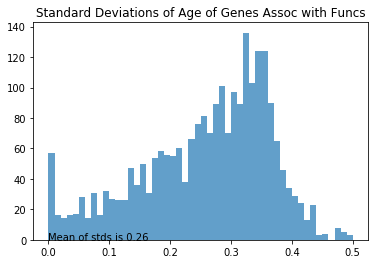

In [2]:
plt.title("Standard Deviations of Age of Genes Assoc with Funcs")
plt.hist(std_list,bins=50,alpha=0.7)
plt.text(0,0,'Mean of stds is %.2f' %np.mean(std_list))

Text(0,0,u'Mean of mean ages is 0.56')

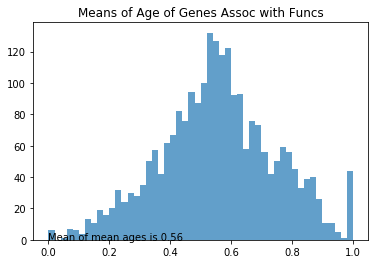

In [3]:
plt.title("Means of Age of Genes Assoc with Funcs")
plt.hist(mean_list,bins=50,alpha=0.7)
plt.text(0,0,'Mean of mean ages is %.2f' %np.mean(mean_list))

Text(0.5,0,u'Gene Age')

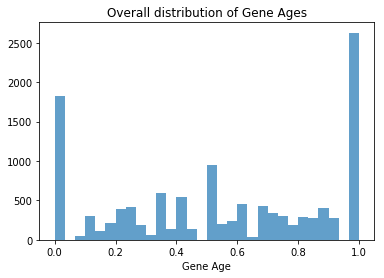

In [4]:
#PLOT OVERALL DISTRIBUTION OF GENE AGES
plt.hist(ages_list,bins=30,alpha=0.7)
plt.title("Overall distribution of Gene Ages")
plt.xlabel("Gene Age")
#plt.savefig("figures/overall_distrib_gene_ages.png")

(array([2.235e+03, 4.200e+01, 3.000e+01, 2.200e+01, 6.000e+00, 0.000e+00,
        3.000e+00, 7.000e+00, 5.000e+00, 3.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([3.00000e+00, 1.54520e+02, 3.06040e+02, 4.57560e+02, 6.09080e+02,
        7.60600e+02, 9.12120e+02, 1.06364e+03, 1.21516e+03, 1.36668e+03,
        1.51820e+03, 1.66972e+03, 1.82124e+03, 1.97276e+03, 2.12428e+03,
        2.27580e+03, 2.42732e+03, 2.57884e+03, 2.73036e+03, 2.88188e+03,
        3.03340e+03, 3.18492e+03, 3.33644e+03, 3.48796e+03, 3.63948e+03,
        3.7

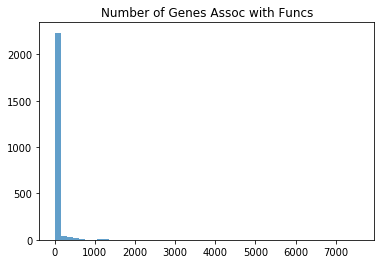

In [5]:
plt.title("Number of Genes Assoc with Funcs")
plt.hist(len_list,bins=50,alpha=0.7)

In [6]:
# GENERATE RANDOM AGE DATA OF SAME LENGTHS
#get the means and stds of the random grouped datasets
rand_mean_list = []
rand_std_list = []
for l in len_list: 
    curr_ages = random.sample(ages_list,l)
    m = np.mean(curr_ages)
    s = np.std(curr_ages)
    rand_mean_list.append(m)
    rand_std_list.append(s)

"""
# more efficient way to only gen one dataset per length
# but graphs look bad bcuz less varied
rand_mean_list = []
rand_std_list = []
# make random age lists of len size and see that distrib
len_set = set(len_list)
print len(len_set)
for l in len_set: 
    curr_ages = random.sample(ages_list,l)
    m = np.mean(curr_ages)
    s = np.std(curr_ages)
    rand_mean_list.extend([m for i in xrange(0,len_list.count(l))])
    rand_std_list.extend([s for i in xrange(0,len_list.count(l))])
"""

'\n# more efficient way to only gen one dataset per length\n# but graphs look bad bcuz less varied\nrand_mean_list = []\nrand_std_list = []\n# make random age lists of len size and see that distrib\nlen_set = set(len_list)\nprint len(len_set)\nfor l in len_set: \n    curr_ages = random.sample(ages_list,l)\n    m = np.mean(curr_ages)\n    s = np.std(curr_ages)\n    rand_mean_list.extend([m for i in xrange(0,len_list.count(l))])\n    rand_std_list.extend([s for i in xrange(0,len_list.count(l))])\n'

Text(0,0,u'Mean func stds: 0.26, mean rand stds: 0.33')

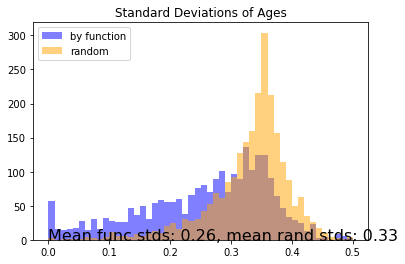

In [7]:
plt.title("Standard Deviations of Ages")
plt.hist(std_list,bins=50,alpha=0.5,color="blue",label="by function")
plt.hist(rand_std_list,bins=50,alpha=0.5,color="orange",label="random")
plt.legend(loc='upper left')
plt.text(0,0,'Mean func stds: %.2f, mean rand stds: %.2f' %(np.mean(std_list),np.mean(rand_std_list)), fontsize = 16)
#plt.savefig("figures/std_by_func_and_rand_distrib.png")
#plt.cla()

[[1.         0.29469208]
 [0.29469208 1.        ]]
0.08244779470439767 0.3271739951963365


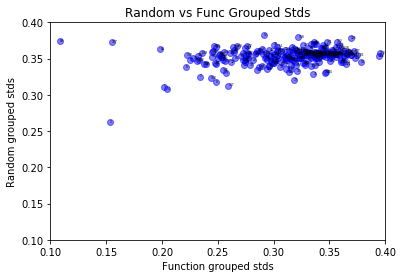

In [8]:
len_dict_func_std_list = {}
len_dict_rand_std_list = {}

for i in xrange(0,len(std_list)):
    l = len_list[i]
    if l not in len_dict_func_std_list:
        len_dict_func_std_list[l] = []
        len_dict_rand_std_list[l] = []
    len_dict_func_std_list[l].append(std_list[i])
    len_dict_rand_std_list[l].append(rand_std_list[i])


len_func_stds = []
len_rand_stds = []
len_order_list = []
for l in len_dict_func_std_list:
    len_func_stds.append(np.mean(len_dict_func_std_list[l]))
    len_rand_stds.append(np.mean(len_dict_rand_std_list[l]))
    len_order_list.append(l)


# PLOT SCATTER OF STDS FUNC GPED VS RAND GPED
fig, ax = plt.subplots()
ax.scatter(len_func_stds, len_rand_stds,  c="blue", alpha=0.5)
plt.title('Random vs Func Grouped Stds')
plt.xlabel('Function grouped stds')
plt.ylabel('Random grouped stds')

for i, txt in enumerate(len_order_list):
    ax.annotate(txt, (len_func_stds[i], len_rand_stds[i]),fontsize = 3)
plt.ylim(0.1,0.4)
plt.xlim(0.1,0.4)

#plt.savefig("figures/scatter_std_by_rand_against_std_by_func_size_annot.png",dpi=800)

slope, intercept = np.polyfit(len_func_stds,len_rand_stds, 1)
print np.corrcoef(len_func_stds,len_rand_stds)
print slope, intercept

6.0 10.0 25.75


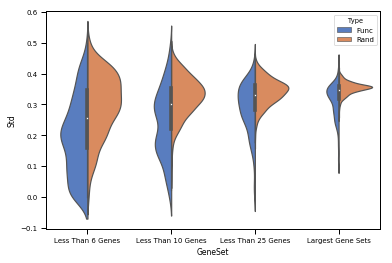

In [9]:
#PLOT VIOLIN OF STDS GROUPED BY SET SIZE
lq = np.percentile(len_list,25)
mq = np.percentile(len_list,50)
uq = np.percentile(len_list,75)
#print len_list

print lq,mq,uq
v_data = []
for l in len_dict_func_std_list:
    if l < lq:
        for s in len_dict_func_std_list[l]:
            v_data.append(["Less Than %d Genes"%lq,s,"Func"])
        for s in len_dict_rand_std_list[l]:
            v_data.append(["Less Than %d Genes"%lq,s,"Rand"])
    elif l < mq:
        for s in len_dict_func_std_list[l]:
            v_data.append(["Less Than %d Genes"%mq,s,"Func"])
        for s in len_dict_rand_std_list[l]:
            v_data.append(["Less Than %d Genes"%mq,s,"Rand"])
    elif l < uq:
        for s in len_dict_func_std_list[l]:
            v_data.append(["Less Than %d Genes"%uq,s,"Func"])
        for s in len_dict_rand_std_list[l]:
            v_data.append(["Less Than %d Genes"%uq,s,"Rand"])
    else:
        for s in len_dict_func_std_list[l]:
            v_data.append(["Largest Gene Sets",s,"Func"])
        for s in len_dict_rand_std_list[l]:
            v_data.append(["Largest Gene Sets",s,"Rand"])


v_df = pd.DataFrame(v_data,columns = ["GeneSet","Std","Type"])
sns.set_context("paper",font_scale = 0.8)
ax = sns.violinplot(x="GeneSet",y="Std",data=v_df,order = ["Less Than %d Genes"%lq,"Less Than %d Genes"%mq ,"Less Than %d Genes"%uq,"Largest Gene Sets"],hue="Type",palette="muted",split=True)
#plt.savefig("figures/violinplot_of_stds_func_vs_rand.png",dpi=600)
plt.show()